# Machine Learning - Assignment 3
#### Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.co
#### Valentina Cobo Paz - vcobop@unal.edu.co

In [1]:
#import the needed libraries and functions
import pandas as pd
import string
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import load_digits
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import unidecode
import html5lib
from numpy import cov
import scipy as sp
import seaborn as sns
import Cython

1. Let $x = \{x_1, \ldots , x_n\}$ be a subset of an input data set $X $. Consider a kernel function $k :
X \times X \to \mathbb{R}$, which induces a feature space $\phi(X) $.

__a.__ Deduce an expression (using kernels) that, given a vector $w\in X$, calculates the norm of the projection of the image of a point $x $, that it is $\phi(x) $, onto the image of the vector $w $, $\phi(w) $:
$$P_w(x) = \dfrac{<\phi(w),\phi(x)>}{||\phi(w)||}$$

__Proof.__  Note that the principal property of the kernel function is that 

$$k(w,x) = <\phi(w),\phi(x)>$$

In the other hand, we can see that using the natural norm induced in an inner product space we have that

\begin{align*}
||z|| = \sqrt{< z,z >}
\end{align*}
for all $z$ in the feaature space (see https://en.wikipedia.org/wiki/Inner_product_space). Therefore 

\begin{align*}
||\phi(w)||&= \sqrt{<\phi(w),\phi(w)>} = \sqrt{k(w,w)}
\end{align*}
Finally we obtain the expression

\begin{align*}
P_w(x) &= \frac{<\phi(w),\phi(x)>}{||\phi(w)||} \\ \\
&= \frac{k(w,x)}{\sqrt{k(w,w)}} 
\end{align*}
using only kernels.

__b.__ Deduce an expression (using kernels) to calculate the sample variance of the projections in the feature space of a set of points along a vector $w $:
$$\text{Var}_{\phi(w)}(x)= \frac{1}{n}\sum_{i=1}^{n} (P_w(x_i) - \mu)^2$$

__Proof.__ Let's do some alegbra: 
\begin{align*}
\text{Var}_{\phi(w)}(x) & = \frac{1}{n}\sum_{i=1}^{n} (P_w(x_i) - \mu)^2 \\ \\ 
&=  \frac{1}{n}\sum_{i=1}^{n} (P_w(x_i)^2 - 2P_w(x_i)\mu + \mu^2) \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} P_w(x_i)^2 - 2\mu\frac{1}{n}\sum_{i=1}^{n}P_w(x_i) + \mu^2 \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} P_w(x_i)^2 - 2\mu\cdot\mu + \mu^2 \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} P_w(x_i)^2 - 2\mu^2 + \mu^2 \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} P_w(x_i)^2 - \mu^2 \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} \left[\frac{k(w,x_i)}{\sqrt{k(w,w)}}\right]^2  - \left[\frac{1}{n}\sum_{i=1}^{n} P_w(x_i)\right]^2 \\ \\ 
&= \frac{1}{n}\sum_{i=1}^{n} \left[\frac{k(w,x_i)}{\sqrt{k(w,w)}}\right]^2  - \left[\frac{1}{n}\sum_{i=1}^{n} \frac{k(w,x_i)}{\sqrt{k(w,w)}}\right]^2 \\ \\ 
&= \frac{1}{n}\cdot \frac{1}{k(w,w)} \sum_{i=1}^{n} k(w,x_i)^2  - \frac{1}{n^2}\cdot \frac{1}{k(w,w)}\left[\sum_{i=1}^{n} k(w,x_i)\right]^2 \\ \\ 
&= \frac{1}{n\cdot k(w,w)} \left\{\: \sum_{i=1}^{n} k(w,x_i)^2  - \frac{1}{n}\cdot \left[\sum_{i=1}^{n} k(w,x_i)\right]^2 \:\right\} \\ \\ 
\end{align*}
So, finally we get the variance as a function of the kernels.

__c.__ Use the previous expression to calculate the variance of the projections of the images of
the elements of the following point set in $\mathbb{R}^2 $, $x = \{(0, 1),(−1, 3),(2, 4),(3, −1),(−1, −2)\} $
over the images of the vectors $w_1 = (1, 1) $ and $w_2 = (−1, 1) $, in the feature spaces induced
by the following kernels: 

1. $k(x,y)= $ <$x, y$>

2. $k(x,y) = $ <$x,y$>$^2$

3. $k(x,y) = ($<$x,y$> $ + 1)^5 $

4. Gaussian Kernel with $\sigma = 1 $.

In [2]:
#Load the x
x = {'1': [0,-1,2,3,-1], '2': [1,3,4,-1,-2]}
x = pd.DataFrame(x)
print(x)

   1  2
0  0  1
1 -1  3
2  2  4
3  3 -1
4 -1 -2


In [3]:
#First kernel
def projections(x , w):
    kernel_w_w = np.dot(w, w)
    projections=[]
    for index, row in x.iterrows():
        kernel_w_x = np.dot(row, w)
        projection = kernel_w_x/(np.sqrt(kernel_w_w))
        projections.append(projection)
    return np.array(projections)

print(projections(x , [1,1]))

[ 0.70710678  1.41421356  4.24264069  1.41421356 -2.12132034]


In [4]:
def projection(x,w):
    kernel_w_w = np.dot(w, w)
    projections=[]
    for i in range(len(x)):
        kernel_x_w=np.dot(x.iloc[i].to_list(),w)
        proj=kernel_x_w/np.sqrt(kernel_w_w)
        projections.append(proj)
    return projections
        #kernel_w_x=np.dot()
print(projection(x,[1,1]))

[0.7071067811865475, 1.414213562373095, 4.242640687119285, 1.414213562373095, -2.1213203435596424]


In [7]:
variance_of_projections_over_w1 = np.var(projections(x , [1,1]))
variance_of_projections_over_w2 = np.var(projections(x , [-1,1]))
print(variance_of_projections_over_w1) ; print(variance_of_projections_over_w2)

4.119999999999999
3.7199999999999998


In [8]:
#Second kernel
def projections(x , w):
    kernel_w_w = (np.dot(w, w))**2
    projections=[]
    for index, row in x.iterrows():
        kernel_w_x = (np.dot(row, w))**2
        projection = kernel_w_x/(np.sqrt(kernel_w_w))
        projections.append(projection)
    return np.array(projections)

In [9]:
variance_of_projections_over_w1 = np.var(projections(x , [1,1]))
variance_of_projections_over_w2 = np.var(projections(x , [-1,1]))
print(variance_of_projections_over_w1) ; print(variance_of_projections_over_w2)

41.339999999999996
12.059999999999999


In [10]:
#Third kernel
def projections(x , w):
    kernel_w_w = (np.dot(w, w) + 1)**5
    projections=[]
    for index, row in x.iterrows():
        kernel_w_x = (np.dot(row, w) + 1)**5
        projection = kernel_w_x/(np.sqrt(kernel_w_w))
        projections.append(projection)
    return np.array(projections)

In [11]:
variance_of_projections_over_w1 = np.var(projections(x , [1,1]))
variance_of_projections_over_w2 = np.var(projections(x , [-1,1]))
print(variance_of_projections_over_w1) ; print(variance_of_projections_over_w2)

183362.81909465024
6494.9935802469145


In [12]:
#Fourth kernel
def projections(x , w, sigma):
    kernel_w_w = 1 #k(z,z) = 1 in all gaussian kernel for all z
    projections=[]
    for index, row in x.iterrows():
        kernel_w_x = np.exp(-((np.linalg.norm(row-w))**2)/(2*(sigma^2)))
        projection = kernel_w_x/(np.sqrt(kernel_w_w))
        projections.append(projection)
    return np.array(projections)

print(projections(x , [1,1] , 1))

[0.84648172 0.26359714 0.1888756  0.26359714 0.11455884]


In [13]:
variance_of_projections_over_w1 = np.var(projections(x , [1,1] , sigma = 1))
variance_of_projections_over_w2 = np.var(projections(x , [-1,1] , sigma = 1))
print(variance_of_projections_over_w1) ; print(variance_of_projections_over_w2)

0.06835120883548426
0.095379016621914


#### 2. Digit recognizition model understanding.

__a.__ Get the data for the MNIST data set: http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository.

In [14]:
#Load the digits recognition dataset
digits = datasets.load_digits()

we plot the first 4 digits data, that it's compose for 8x8 matrix.

(1797, 64)

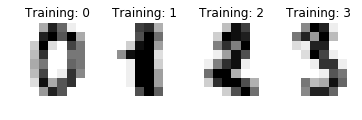

In [15]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

__b.__ Normalize your features so that each one has mean $0$ and standard deviation $1$.

In [16]:
means = np.mean(data, axis = 0)
sdts =  np.mean(data, axis = 0)
scaler = preprocessing.StandardScaler()
normalized_data = scaler.fit_transform(data)

For check the mean=0 and std=1

In [17]:
print(normalized_data[:,10].mean())
print(normalized_data[:,20].std())

1.9770248629941574e-17
1.0000000000000056


__c.__ Choose two classes (e.g. $1$ and $0$, or $6$ and $9$) and train a linear SVM to discriminate between them. Find an optimal complexity parameter, $C$, plotting the training and test error vs. the regularization parameter. Use a logarithmic scale for $C=\{2^{-15} , 2^{-14} , \ldots , 2^{10}\}$. Discuss the results.

We decide to use the classes $1$ and $5$.

for the 1 and 5 class, we reduced the set of observation, only for the two selected classes

In [18]:
class_0 = 5
class_1 = 1
exercise_data = normalized_data[(digits.target == class_0) | (digits.target == class_1)]
exercise_target = digits.target[(digits.target == class_0) | (digits.target == class_1)]
digits_images = digits.images[(digits.target == class_0) | (digits.target == class_1)]
n_samples = len(digits_images)

print(exercise_data.shape) ; print(exercise_target.shape) ; print(digits_images.shape) ; print(n_samples)

(364, 64)
(364,)
(364, 8, 8)
364


In [19]:
#For the support vector clasifier
classifier = svm.SVC(C = 1, gamma=0.0001, kernel='linear')

The classifier is train with the 80% of the data.

In [20]:
classifier.fit(exercise_data[:int(n_samples*0.8)], exercise_target[:int(n_samples*0.8)])

#Now predict the value of the digit on the second half:
expected = exercise_target[int(n_samples*0.8):]
predicted = classifier.predict(exercise_data[int(n_samples*0.8):])
print(expected) ; print(predicted)

[5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5
 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5]
[5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 1 5 5 1 5 1 1 1 5 5
 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5]


Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        36
           5       1.00      0.97      0.99        37

   micro avg       0.99      0.99      0.99        73
   macro avg       0.99      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73


Confusion matrix:
[[36  0]
 [ 1 36]]


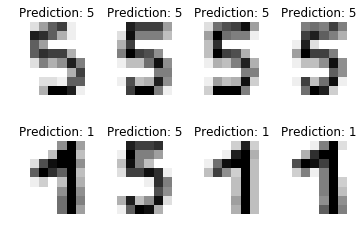

In [21]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits_images[int(n_samples*0.8):], predicted))
aux=0
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    #print(expected[aux],predicted[aux])
    aux+=1
plt.show()

for the plot of training and test error vs. the regularization parameter

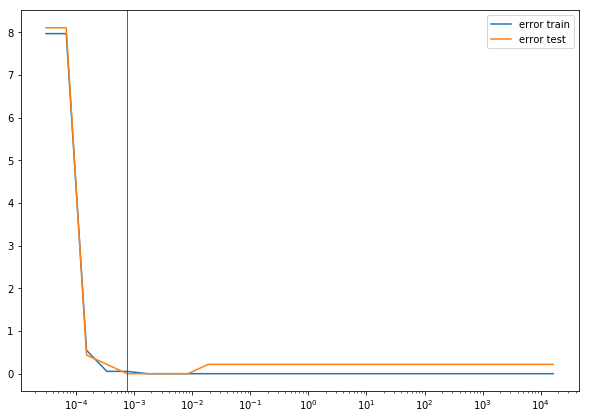

0.0 0.0007609029098247072


In [22]:
c=np.logspace(-15,14,26,base=2)
error_train=[]
error_test=[]
for i in range(len(c)):
    #print(c[i])
    classifier = svm.SVC(C = c[i], gamma =0.0001, kernel='linear')
    classifier.fit(exercise_data[:int(n_samples*0.80)], exercise_target[:int(n_samples*0.80)])
    expected_test = exercise_target[int(n_samples*0.80):]
    predicted_test = classifier.predict(exercise_data[int(n_samples*0.80):])
    expected_train = exercise_target[:int(n_samples*0.80)]
    predicted_train = classifier.predict(exercise_data[:int(n_samples*0.80)])
    test_score=mean_squared_error(predicted_test, expected_test)
    train_score=mean_squared_error(predicted_train, expected_train)
    error_train.append(train_score)
    error_test.append(test_score)
#print(error)
plt.figure(figsize=(10,7))
plt.plot(c,error_train,label="error train")
plt.plot(c,error_test,label="error test")
plt.axvline(x=c[np.argmin(error_test)],linewidth=0.9,color="rebeccapurple")
plt.xscale("log")
plt.legend()
plt.show()
print(np.min(error_test),c[np.argmin(error_test)])

In [23]:
np.log(c[np.argmin(error_test)])

-7.181004790601033

In [24]:
c[np.argmin(error_test)]

0.0007609029098247072

For the optimal C in the model (0.009765625), we made a plot for the discriminant function weights.

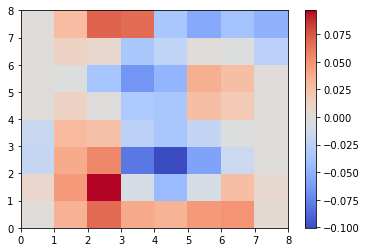

In [25]:
classifier_bestc = svm.SVC(C = (c[np.argmin(error_test)]), kernel='linear')
classifier_bestc.fit(exercise_data[:int(n_samples*0.80)], exercise_target[:int(n_samples*0.80)])
weights=classifier_bestc.coef_
plt.pcolor(weights.reshape((8,8)),cmap="coolwarm")
plt.colorbar()
plt.show()

For diferents C in the model.

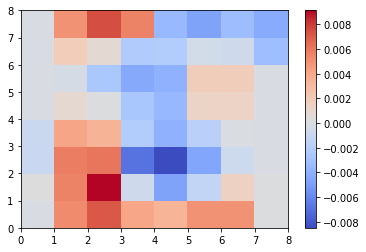

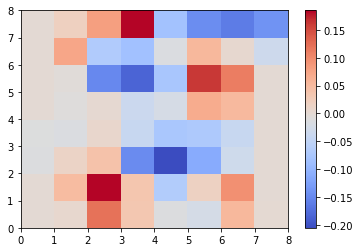

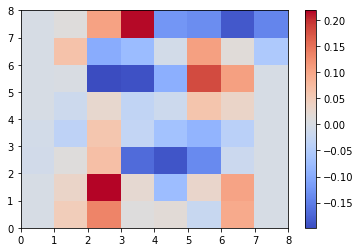

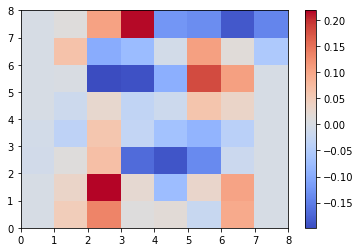

In [26]:
c_n=[2**-15,2**-5,2**5,2**10]
weight_matrix=[]
for i in range(len(c_n)):
    classifier_c = svm.SVC(C = c_n[i], kernel='linear')
    classifier_c.fit(exercise_data[:int(n_samples*0.80)], exercise_target[:int(n_samples*0.80)])
    weights=classifier_c.coef_
    weight_matrix.append(weights.reshape((8,8)))
    plt.pcolor(weights.reshape((8,8)),cmap="coolwarm")
    plt.colorbar()
    plt.show()
weight_matrix=np.array(weight_matrix)

In order to compare the weights matrix, we calculated the distance between them for $C=(2^{-15},2^{-14},...,2^{10})$. 

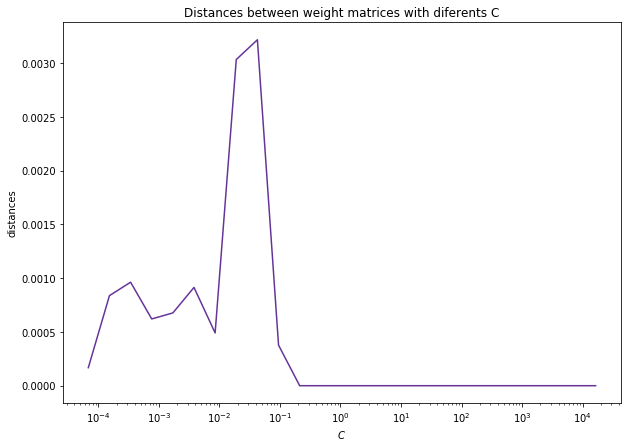

In [27]:
weight_matrix=[]

for i in range(len(c)):
    classifier_c = svm.SVC(C = c[i], kernel='linear')
    classifier_c.fit(exercise_data[:int(n_samples*0.80)], exercise_target[:int(n_samples*0.80)])
    weights=classifier_c.coef_
    weight_matrix.append(weights.reshape((8,8)))
weight_matrix=np.array(weight_matrix)
w=len(weight_matrix)
a=weight_matrix[0]
distances_weight=[]
for j in range(1,w):
    b=weight_matrix[j]
    a_b=a-b
    distance_ab=np.trace(a_b*np.transpose(a_b))
    distances_weight.append(distance_ab)
    a=b
plt.figure(figsize=(10,7))
plt.plot(c[1:],distances_weight, color="Rebeccapurple")
plt.xlabel(r"$C$")
plt.ylabel("distances")
plt.xscale("log")
plt.title("Distances between weight matrices with diferents C")
plt.show()

This plot is a simple way to compare the behaviour of the model when the complexity parameter ($C$) changes. As the complexity parameter increase the diference between the models tends to be zero, having an elbow around $C\approx10^{-1}$, which indicates that further values of complexity are not necesary since the weights of the model are not changing at all, how ever, by adding more data to the model choosing a $C$ larger than the one found in here, could cause an overfitting.

#### d. Train an SVM for detecting whether a word belongs to French or Spanish

In [28]:
url="https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/French_wordlist_opensubtitles_5000"
a=pd.read_html(url,header=0)[0]
a = a.head(2000)

In [29]:
URLS= ["https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish1000", 
       "https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish1001-2000",
       "https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish2001-3000",
       "https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish3001-4000",
       "https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish4001-5000"
      ]
tables = []
for url in URLS:
    print(url)
    tables.append(pd.read_html(url,header=0)[0])
b=pd.concat(tables,ignore_index = True)
b=b.head(2000)

https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish1000
https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish1001-2000
https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish2001-3000
https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish3001-4000
https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish4001-5000


In [30]:
spanish_words = b[b['word'].str.len() >= 4]['word']
french_words = a[a['word'].str.len() >= 4]['word']

In [31]:
len(spanish_words)

1831

In [32]:
len(french_words)

1771

In [33]:
french_without_accent = np.array(french_words.apply(unidecode.unidecode))
spanish_without_accent = np.array(spanish_words.apply(unidecode.unidecode))

#Une todo en un input space y un objetivo (una variable de 0 y 1 que dice si es frances o español)
input_space_words = np.append(french_without_accent, spanish_without_accent)
language_words = np.append(np.repeat(0,len(french_without_accent)) , 
                           np.repeat(1,len(spanish_without_accent)))

In [34]:
#Genera la matriz de n-gramas
vectorizer = CountVectorizer(analyzer = 'char',  ngram_range=(1, 3))
input_space = vectorizer.fit_transform(input_space_words)

In [35]:
#Construye los kernels de chi y cosine
cosine_kernel_similarity = metrics.pairwise.cosine_similarity(input_space.toarray())
chi_kernel_similarity = metrics.pairwise.chi2_kernel(input_space.toarray())

In [36]:
#Construye el kernel histogram intersection
space = input_space.toarray()
space = np.apply_along_axis( lambda x: x/x.sum(), axis =1 , arr = space)
distance_matrix = []
for idx1 in range(space.shape[0]):
    row_ac = []
    for idx2 in range(space.shape[0]):
        minac = np.minimum(space[idx1],space[idx2])
        row_ac.append(minac.sum())    
    distance_matrix.append(row_ac)

In [37]:
distance = np.array(distance_matrix)
distance.shape

(3602, 3602)

## Kernel coseno

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(cosine_kernel_similarity, language_words, test_size = 0.20)  

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
c=np.logspace(-15,10,26,base=2)
c_Score=[]
for c_value in c:
    clf =  LinearSVC(C = c_value)
    #clf =  LinearSVC(C = 1)
    score=cross_val_score(clf, X_train, y_train, cv = 5)
    c_Score.append(score.mean())

In [43]:
print("The optimal c is: C=",c[np.argmax(c_Score)])

The optimal c is: C= 2.0


In [44]:
clf =  LinearSVC(C = c[np.argmax(c_Score)])
clf.fit(X_train, y_train)
#Now predict the value of the digit on the second half:
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       360
           1       0.88      0.88      0.88       361

   micro avg       0.88      0.88      0.88       721
   macro avg       0.88      0.88      0.88       721
weighted avg       0.88      0.88      0.88       721


Confusion matrix:
[[315  45]
 [ 43 318]]


## Kernel chi

In [45]:
X_train, X_test, y_train, y_test = train_test_split(chi_kernel_similarity, language_words, test_size = 0.20)  

In [46]:
c=np.logspace(-15,10,26,base=2)
c_Score=[]
for c_value in c:
    clf =  LinearSVC(C = c_value)
    #clf =  LinearSVC(C = 1)
    score=cross_val_score(clf, X_train, y_train, cv = 5)
    c_Score.append(score.mean())
print("The optimal c is: C=",c[np.argmax(c_Score)])
clf =  LinearSVC(C = c[np.argmax(c_Score)])
clf.fit(X_train, y_train)
#Now predict the value of the digit on the second half:
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

The optimal c is: C= 512.0
Classification report for classifier LinearSVC(C=512.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
              precision    recall  f1-score   support

           0       0.85      0.33      0.48       356
           1       0.59      0.94      0.73       365

   micro avg       0.64      0.64      0.64       721
   macro avg       0.72      0.64      0.60       721
weighted avg       0.72      0.64      0.61       721


Confusion matrix:
[[119 237]
 [ 21 344]]


## Kernel intersection

In [47]:
X_train, X_test, y_train, y_test = train_test_split(distance, language_words, test_size = 0.20)

In [48]:
c=np.logspace(-15,10,26,base=2)
c_Score=[]
for c_value in c:
    clf =  LinearSVC(C = c_value)
    #clf =  LinearSVC(C = 1)
    score=cross_val_score(clf, X_train, y_train, cv = 5)
    c_Score.append(score.mean())
print("The optimal c is: C=",c[np.argmax(c_Score)])
clf =  LinearSVC(C = c[np.argmax(c_Score)])
clf.fit(X_train, y_train)
#Now predict the value of the digit on the second half:
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

The optimal c is: C= 1.0
Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       342
           1       0.90      0.90      0.90       379

   micro avg       0.90      0.90      0.90       721
   macro avg       0.90      0.90      0.90       721
weighted avg       0.90      0.90      0.90       721


Confusion matrix:
[[304  38]
 [ 37 342]]


## Kernel SSK

In [49]:
%load_ext Cython

In [50]:
%%cython
import numpy as np
cimport numpy as np

from cpython cimport array
import array

cimport cython

def ssk(s, t, int n, float lbda, accum=False):
    """s and t are strings, either numpy.str_ or python str, or a list of chars"""
    s_array = array.array('l', [ord(c) for c in s])
    t_array = array.array('l', [ord(c) for c in t])
    return ssk_array(s_array, t_array, n, lbda, accum)

# Kernel defined by Lodhi et al. (2002)
@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def ssk_array(array.array s_, array.array t_, int n, float lbda, accum=False):
    cdef int lens, lent
    cdef int i, sj, tk
    cdef float toret
    cdef long[:] s # this reduces the overhead 10x fold!!!
    cdef long[:] t

    s = s_ if s_.typecode == 'l' else array.array('l', [int(c) for c in s_])
    t = t_ if t_.typecode == 'l' else array.array('l', [int(c) for c in t_])

    lens, lent = len(s), len(t)
    #k_prim = (-1)*np.ones( (n+1, lens, lent) )
    cdef np.ndarray[np.float64_t, ndim=3] \
        k_prim = np.zeros( (n, lens, lent), dtype=np.float )

    k_prim[0,:,:] = 1

    for i in range(1,n):
        for sj in range(i,lens):
            toret = 0.
            for tk in range(i,lent):
                if s[sj-1]==t[tk-1]: # trick taken from shogun implemantion of SSK
                    toret = lbda * (toret + lbda*k_prim[i-1,sj-1,tk-1])
                else:
                    toret *= lbda
                k_prim[i,sj,tk] = toret + lbda * k_prim[i, sj-1, tk]

    cdef int start = 0 if accum else n-1
    cdef float k = 0.

    for i in range(n):
        for sj in range(i,lens):
            for tk in range(i,lent):
                if s[sj]==t[tk]:
                    k += lbda*lbda*k_prim[i,sj,tk]

    # print( [len(list(i for (sj,tk,i) in k_prim if i==m-1)) for m in range(n)] )
    return k

def string_kernel(xs, ys, n, lbda):
    """xs and ys are numpy arrays of strings or arrays of ints, n an integer and lbda a bool"""
    if len(xs.shape) != 2 or len(ys.shape) != 2 or xs.shape[1] != 1 or ys.shape[1] != 1:
        raise "The shape of the features is wrong, it must be (n,1)"

    cdef int lenxs, lenys
    cdef int i, j
    cdef np.ndarray[np.float64_t, ndim=2] mat, mat_xs, mat_ys
    lenxs, lenys = xs.shape[0], ys.shape[0]

    mat = np.zeros( (lenxs, lenys) )

    ssk_fun = ssk_array if xs.dtype == 'O' and isinstance(xs[0,0], array.array) else ssk

    # If both lists are equal, then the resulting matrix is symetric, there is no need to
    # calculate the hole thing
    if lenxs == lenys and np.array_equal(xs, ys):
        for i in range(lenxs):
            for j in range(i,lenys):
                mat[j,i] = mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = mat_ys = mat.diagonal().reshape( (lenxs, 1) )

    else:
        for i in range(lenxs):
            for j in range(lenys):
                mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = np.zeros( (lenxs, 1) )
        mat_ys = np.zeros( (lenys, 1) )

        for i in range(lenxs):
            mat_xs[i] = ssk_fun(xs[i,0], xs[i,0], n, lbda, accum=True)
        for j in range(lenys):
            mat_ys[j] = ssk_fun(ys[j,0], ys[j,0], n, lbda, accum=True)

    return np.divide(mat, np.sqrt(mat_ys.T * mat_xs))

In [51]:
    print("Testing...")
    lbda = .6
    assert abs( ssk("cat", "cart", 4, lbda, accum=True) - (3*lbda**2 + lbda**4 + lbda**5 + 2*lbda**7) ) < 1e-6
    assert ssk("science is organized knowledge", "wisdom is organized life", 4, 1, accum=True) == 20538.0

    xs = np.array( ["cat", "car", "cart", "camp", "shard"] ).reshape( (5,1) )
    ys = np.array( ["a", "cd"] ).reshape( (2,1) )
    print( string_kernel(xs, ys, 2, 1.) )
    assert abs( string_kernel(xs, ys, 2, 1.)[0,0] - 0.40824829 ) < 1e-6

    test = "This is a very long string, just to test how fast this implementation of ssk is. It should look like the computation tooks no time, unless you're running this in a potato pc"
    print( ssk(test, test, 30, .8, accum=True) )


Testing...
[[0.40824829 0.23570226]
 [0.40824829 0.23570226]
 [0.31622777 0.18257419]
 [0.31622777 0.18257419]
 [0.25819889 0.1490712 ]]
1572869636096.0


In [52]:
size = len(input_space_words)
xs = input_space_words.reshape((size,1))
ys = input_space_words.reshape((size,1))
distance_ssk = np.array(string_kernel(xs, ys, 3, 1.))

In [53]:
distance_ssk.shape

(3602, 3602)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(distance_ssk, language_words, test_size = 0.20)  

In [55]:
c=np.logspace(-15,10,26,base=2)
c_Score=[]
for c_value in c:
    clf =  LinearSVC(C = c_value)
    #clf =  LinearSVC(C = 1)
    score=cross_val_score(clf, X_train, y_train, cv = 5)
    c_Score.append(score.mean())
print("The optimal c is: C=",c[np.argmax(c_Score)])
clf =  LinearSVC(C = c[np.argmax(c_Score)])
clf.fit(X_train, y_train)
#Now predict the value of the digit on the second half:
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

The optimal c is: C= 0.5
Classification report for classifier LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       373
           1       0.89      0.85      0.87       348

   micro avg       0.88      0.88      0.88       721
   macro avg       0.88      0.87      0.87       721
weighted avg       0.88      0.88      0.88       721


Confusion matrix:
[[336  37]
 [ 53 295]]


For each kernel model, we calculated the maximum $C-score$ in order to find the optimal $C$ for the models, we saw that this parameter is very variable. 
for the four models, we find that chi-kernel model don't have a good performance, with a f1-score=0.48, how ever, the other three models present a good classification with a metrics scores greather than 0.8.
We calculated a cross-validation with 5 folds, that support or validated the accurate of the models.